In [1]:
from numericMethods.ode.run_kut4 import integrate
from numericMethods.rootFinding.ridders import ridder
import numpy as np
from math import isnan



#Define the initial conditions as a function of u - in the shooting method we don't know the proper initial condition for E(0)
#such that the condition phi(d)=V0, where d is the laminar flux region.


#Define the initial conditions as a function of u - in the shooting method we don't know the proper initial condition for E(0)
#such that the condition phi(d)=V0, where d is the laminar flux region.
Psi_all = []
Cp_all = []
Cm_all = []
E_all = []

reactRate = np.array([1, 5, 7])*5e-5

for p in range(0,len(reactRate)):

    def init(u):
        return np.array([Cb, Cb, u, 0])

    # Define the function F(x,y) such that y' = F(x,y)
    def F(x,y):
        #C plus
        Cp =  y[0]
        #C minus
        Cm = y[1]
        #E electric field
        E = y[2]
        #Electric potential
        V = y[3]
        #Function
        #r0 = r/k
        F = np.zeros(4)
        F[0] = Cp*E + r0
        F[1] = -Cm*E
        F[2] = (Cp-Cm)
        F[3] = -E
        return F

    def invert(A):
        B = []
        N = len(A)
        for i in range(0,N):
            B.append(A[N-1-i])
        return np.array(B)


    def find_not_nan(L):
        for i in range(0,len(L)-1):
            if(isnan(L[len(L)-1-i]) == False):
                return len(L)-1-i

    def r(u):
        X,Y = integrate(F, xStart, init(u), xStop, step)
        V_u = Y[-1,3]
        if(isnan(V_u)):
            index = int(find_not_nan(Y[:,3]))
            V_u = Y[index,3]

        return (V_u-V_0)/V_0

    #Here we start the algorithm to find de numeric solution to the system defined by y'=F(x,y). Note that here y
    #is a vector with four components

    #Define integration range.

    xStop = 20.0
    xStart = 0.0
    
    z = 2
    e = 1.60217662E-19
    k = 1.38064852E-23
    T = 300
    Na = 6.02E23
    Fa = 96485.3329#Na * e
    R = Na * k
    coef = z*e/(k*T)
    V_0 = -coef*0.15
    D = 1.05
    Cb = 1e-3
    
    #Define the number of steps of integration.
    N = 1E3
    step = (xStop-xStart)/N
    r0 = reactRate[p]
    u1 = -V_0
    u2 = 0


    epsilon = 80.9 * 8.85418782E-12
    k = np.sqrt(2 * Cb * (z*Fa) ** 2 / (R * T * epsilon))
    u = ridder(r, u1, u2)

    #Plot results, if initial condition for E(0) is found.


    import matplotlib.pyplot as plt

    if (u != None):
        X,Y = integrate(F, xStart, init(u), xStop, step)
        Cp = invert(Y[:,0])
        Cm = invert(Y[:,1])
        E = -k/coef * invert(Y[:,2])
        phi = 1/coef * invert(Y[:,3])
        xi = X
        print("Border condition at interface is: " + str(-77.357*0.15))
        print("Obtained border condition with shooting method: " + str(phi[0]))
        print("Obtained border condition in the bulk: " + str(E[-1]))
        print("Shooting error: " + str((phi[0]-V_0)/V_0))
        

    #Plot electric potential
        #plt.figure(1)
        #plt.title('Numeric Potential', fontsize=16, fontweight='bold')
        #plt.xlabel(r'$\xi = \kappa x$', fontsize=16)
        #plt.ylabel(r'Dimentionless potential ', fontsize=16)
        #plt.plot(X[:], phi, 'g', label = "Potential")
        #plt.axis([xStart, xStop, -20, -0.0])
        #plt.legend()
        #plt.savefig('potential.eps', format='eps', dpi=1000, fontsize=16, fontweight='bold')
        #plt.show()
        
        #Plot electric field
        #plt.figure(2)
        #plt.plot(X[:], E, 'g', label = "Electric Field")
        #plt.axis([xStart, xStop, 0.0, 100])
        #plt.legend()
        #plt.savefig('Efield.eps', format='eps', dpi=1000, fontsize=16, fontweight='bold')
        #plt.show()

        #Plot Concetration
        #plt.figure(3)
        #plt.title('Numeric Concentration', fontsize=16, fontweight='bold')
        #plt.xlabel(r'$\xi = \kappa x$', fontsize=16)
        #plt.ylabel(r'Molar Concentration ', fontsize=16)
        #plt.plot(X[:], Cp, 'b', label = "Concentration +")
        #plt.axis([xStart, xStop, 0, 1])
        #plt.plot(X[:], Cm, 'r', label = "Concentration -")
        #plt.legend()
        
        

        file = open('./results/potential-num-r'+str(r0)+'.txt', 'w')
        file2 = open('./results/cp-num-r'+str(r0)+'.txt', 'w')
        file3 = open('./results/cm-num-r'+str(r0)+'.txt', 'w')
        file4 = open('./results/E-num-r' + str(r0) + '.txt', 'w')


        for i in range(0, len(xi)):
            file.write(str(xi[i]/k*1E9) + "\t" +  str(phi[i]) + "\n")
            file2.write(str(xi[i]/k*1E9) + "\t" +  str(Cp[i]) + "\n")
            file3.write(str(xi[i]/k*1E9) + "\t" +  str(Cm[i]) + "\n")
            file4.write(str(xi[i]/k*1E9) + "\t" + str(E[i]) + "\n")
            
        file.close()
        file2.close()
        file3.close()
        file4.close()
        Psi_all.append(phi)
        E_all.append(E)
        Cp_all.append(Cp)
        Cm_all.append(Cm)



/Users/creative-work/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in double_scalars
/Users/creative-work/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in double_scalars
/Users/creative-work/github/masterthesis/thesis/chapters/ch02/code/numericMethods/ode/run_kut4.py:22: RuntimeWarning: invalid value encountered in add
  return (K0 + 2.0*K1 + 2.0*K2 + K3)/6.0
/Users/creative-work/github/masterthesis/thesis/chapters/ch02/code/numericMethods/rootFinding/ridders.py:27: RuntimeWarning: overflow encountered in double_scalars
  s = math.sqrt(fc**2 - fa*fb)
/Users/creative-work/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/Users/creative-work/github/masterthesis/thesis/chapters/ch02/code/numericMethods/ode/run_kut4.py:19: RuntimeWarning: inva

Root found!: x = 0.2294839566462737 => r(x) = -0.00022724290009343498
Tolerance: 0.01
Border condition at interface is: -11.60355
Obtained border condition with shooting method: -0.149965913564986
Obtained border condition in the bulk: -19039.656034297877
Shooting error: -0.9870769418284269


/Users/creative-work/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in double_scalars
/Users/creative-work/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in double_scalars
/Users/creative-work/github/masterthesis/thesis/chapters/ch02/code/numericMethods/ode/run_kut4.py:22: RuntimeWarning: invalid value encountered in add
  return (K0 + 2.0*K1 + 2.0*K2 + K3)/6.0
/Users/creative-work/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/Users/creative-work/github/masterthesis/thesis/chapters/ch02/code/numericMethods/ode/run_kut4.py:19: RuntimeWarning: invalid value encountered in add
  K1 = h*F(x + h/2.0, y + K0/2.0)
/Users/creative-work/github/masterthesis/thesis/chapters/ch02/code/numericMethods/rootFinding/ridders.py:27: RuntimeWarning: overflo

Root found!: x = 0.18415379237046647 => r(x) = -0.0011096224000164373
Tolerance: 0.01
Border condition at interface is: -11.60355
Obtained border condition with shooting method: -0.14983355663999753
Obtained border condition in the bulk: -15358.835125100388
Shooting error: -0.9870883474618829
Root found!: x = 0.16716638054422672 => r(x) = -0.0006322233785676166
Tolerance: 0.01
Border condition at interface is: -11.60355
Obtained border condition with shooting method: -0.14990516649321486
Obtained border condition in the bulk: -13837.137741929246
Shooting error: -0.9870821766042741


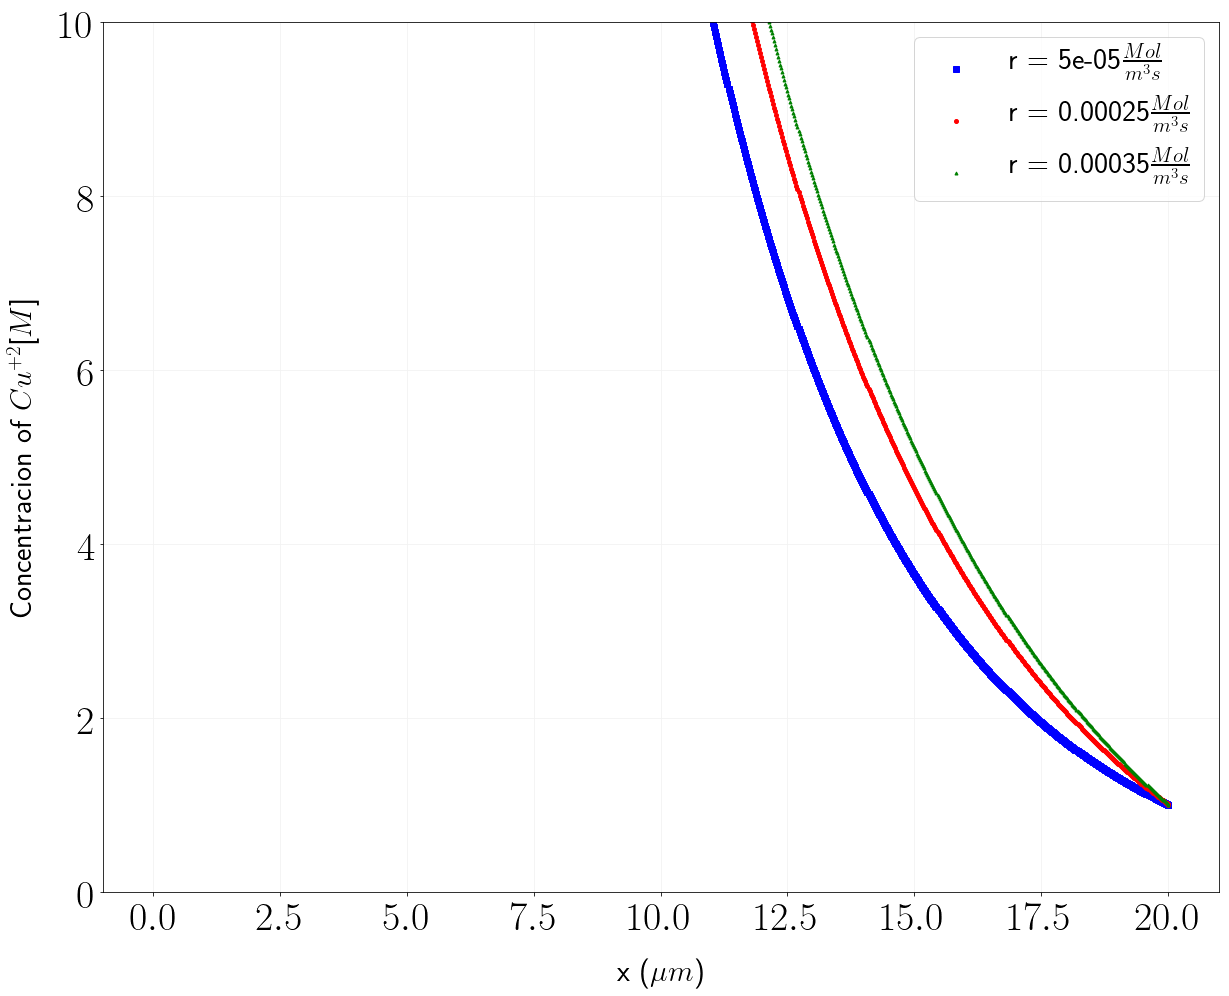

In [9]:
import numpy as np
z = 2
e = 1.60217662E-19
k = 1.38064852E-23
T = 300
Na = 6.02E23
Fa = 96485.3329#Na * e
R = Na * k
coef = z*e/(k*T)
V_0 = -coef*0.15
D = 1.05
Cb = 1e-3
epsilon = 80.9 * 8.85418782E-12
k = np.sqrt(2 * Cb * (z*Fa) ** 2 / (R * T * epsilon))

#X = xi / k * 1E6  #(X / k ) 

mw = 3
fs = 30


fig, ax = plt.subplots(figsize=(20,16))
plt.style.use('thesis')
plt.title('', fontweight='bold')
plt.xlabel(r'x ($\mu m$)', fontsize=fs)
plt.ylabel(r'Concentracion  of $Cu^{+2}$[$M$]', fontsize=fs)
plt.plot(X, 1e3 * Cp_all[0], 'bs', linewidth=mw, label='r = '+str(reactRate[0])+r'$\frac{Mol}{m^3s}$')
plt.plot(X, 1e3 * Cp_all[1], 'ro', markersize=mw+1, label='r = '+str(reactRate[1])+r'$\frac{Mol}{m^3s}$')
plt.plot(X, 1e3 * Cp_all[2], 'g^', markersize=mw, label='r = '+str(reactRate[2])+r'$\frac{Mol}{m^3s}$')
plt.ylim(0,10)
plt.legend()
legend = ax.legend(loc='upper right')
# Put a nicer background color on the legend.



plt.show()

#plt.savefig('potential.eps', format='eps', dpi=1000, fontsize=16, fontweight='bold')

In [10]:
plt.savefig('Concentration-num-'+str(r0)+'.eps', format='eps', dpi=1000, fontsize=16, fontweight='bold')

<Figure size 1440x1152 with 0 Axes>

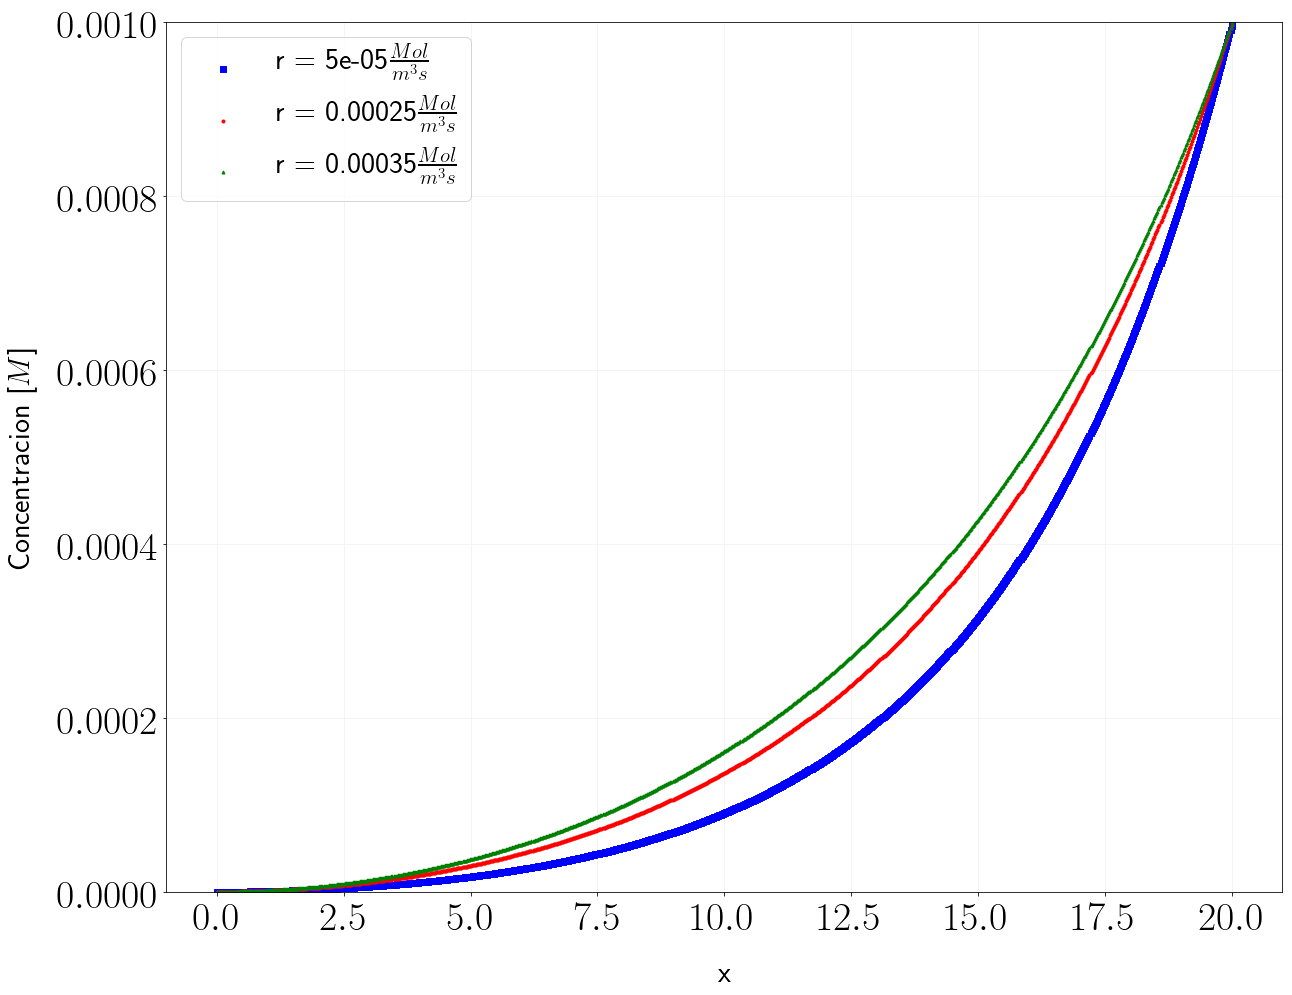

In [18]:

plt.figure(1)
plt.title('', fontsize=fs, fontweight='bold')
plt.xlabel(r'x', fontsize=fs)
plt.ylabel(r'Concentracion [$M$]', fontsize=fs)
plt.plot(X, Cm_all[0], 'bs', linewidth=mw, label='r = '+str(reactRate[0])+r'$\frac{Mol}{m^3s}$')
plt.plot(X, Cm_all[1], 'ro', markersize=mw, label='r = '+str(reactRate[1])+r'$\frac{Mol}{m^3s}$')
plt.plot(X, Cm_all[2], 'g^', markersize=mw, label='r = '+str(reactRate[2])+r'$\frac{Mol}{m^3s}$')
plt.ylim(0,1e-3)
plt.legend()
plt.show()


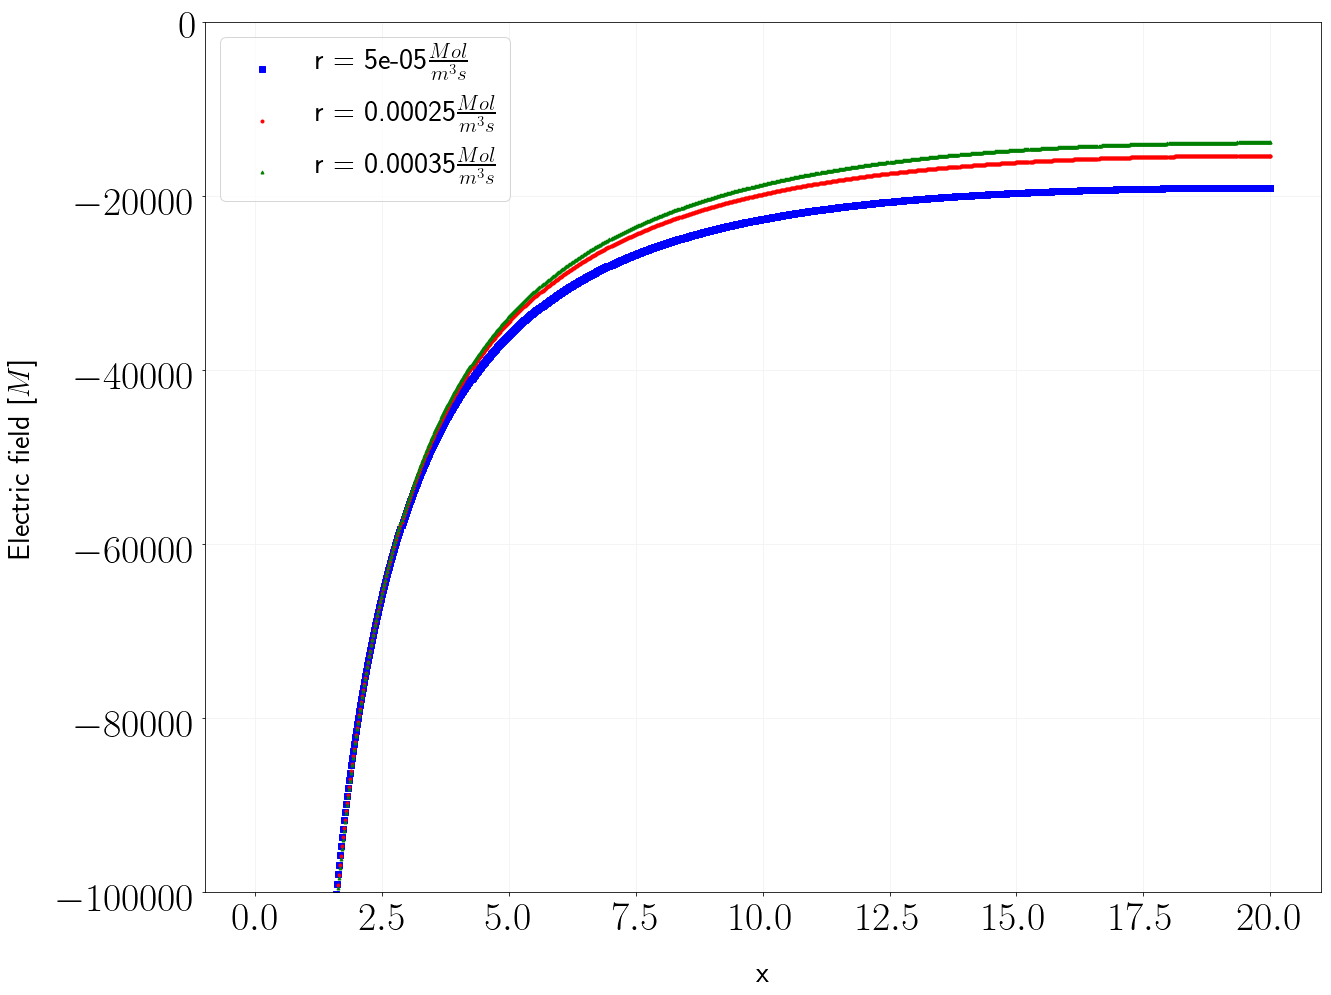

In [38]:

plt.figure(1)
plt.title('', fontsize=fs, fontweight='bold')
plt.xlabel(r'x', fontsize=fs)
plt.ylabel(r'Electric field [$M$]', fontsize=fs)
plt.plot(X, E_all[0], 'bs', linewidth=mw, label='r = '+str(reactRate[0])+r'$\frac{Mol}{m^3s}$')
plt.plot(X, E_all[1], 'ro', markersize=mw, label='r = '+str(reactRate[1])+r'$\frac{Mol}{m^3s}$')
plt.plot(X, E_all[2], 'g^', markersize=mw, label='r = '+str(reactRate[2])+r'$\frac{Mol}{m^3s}$')
plt.ylim(-1e5, 0)
plt.legend()
plt.show()


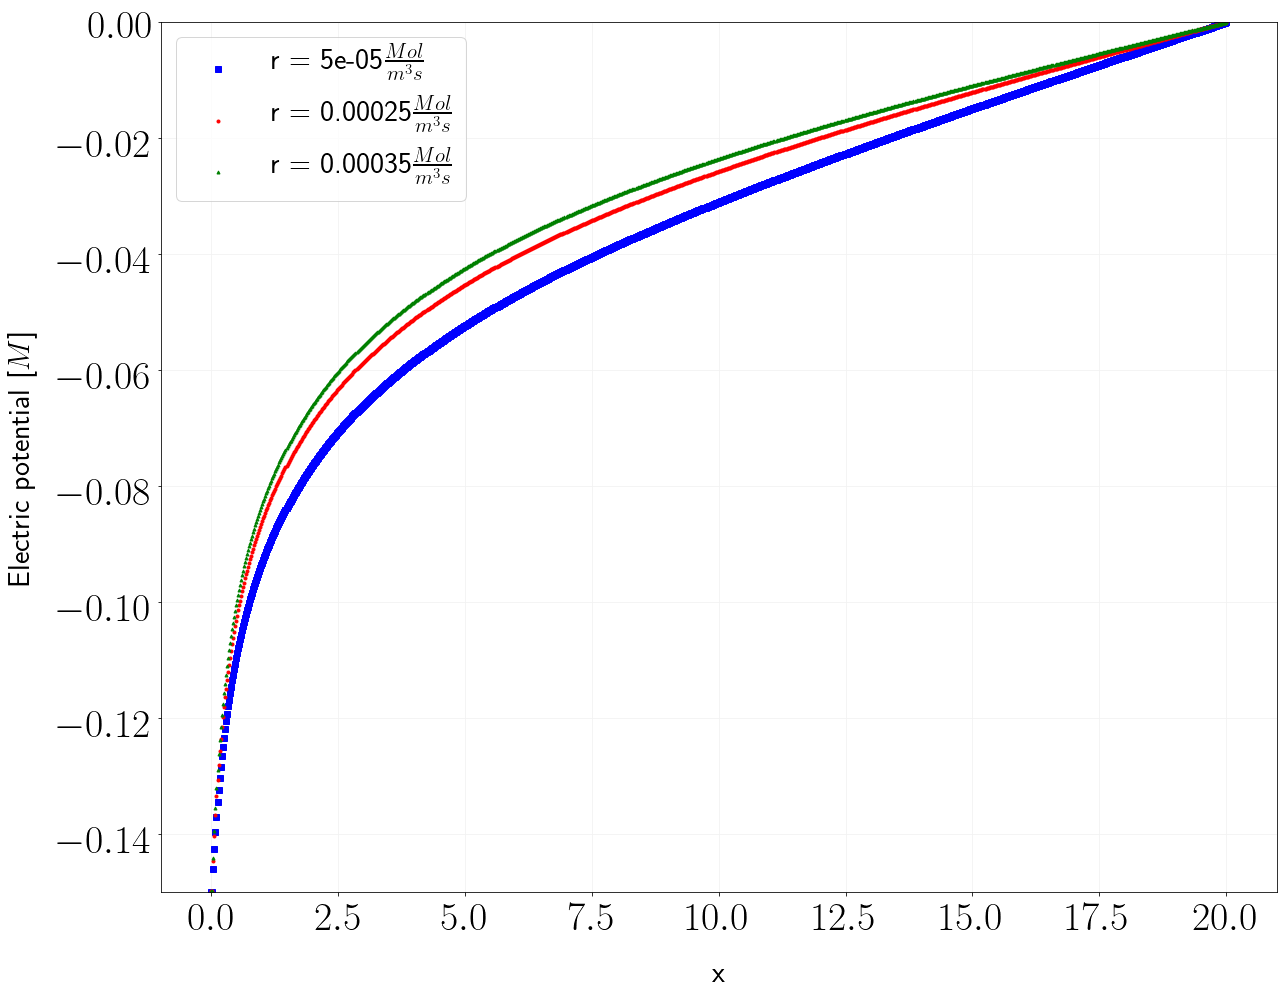

In [13]:

plt.figure(1)
plt.title('', fontsize=fs, fontweight='bold')
plt.xlabel(r'x', fontsize=fs)
plt.ylabel(r'Electric potential [$M$]', fontsize=fs)
plt.plot(X, Psi_all[0], 'bs', linewidth=mw, label='r = '+str(reactRate[0])+r'$\frac{Mol}{m^3s}$')
plt.plot(X, Psi_all[1], 'ro', markersize=mw, label='r = '+str(reactRate[1])+r'$\frac{Mol}{m^3s}$')
plt.plot(X, Psi_all[2], 'g^', markersize=mw, label='r = '+str(reactRate[2])+r'$\frac{Mol}{m^3s}$')
plt.ylim(V_0/coef,0)
plt.legend()
plt.show()


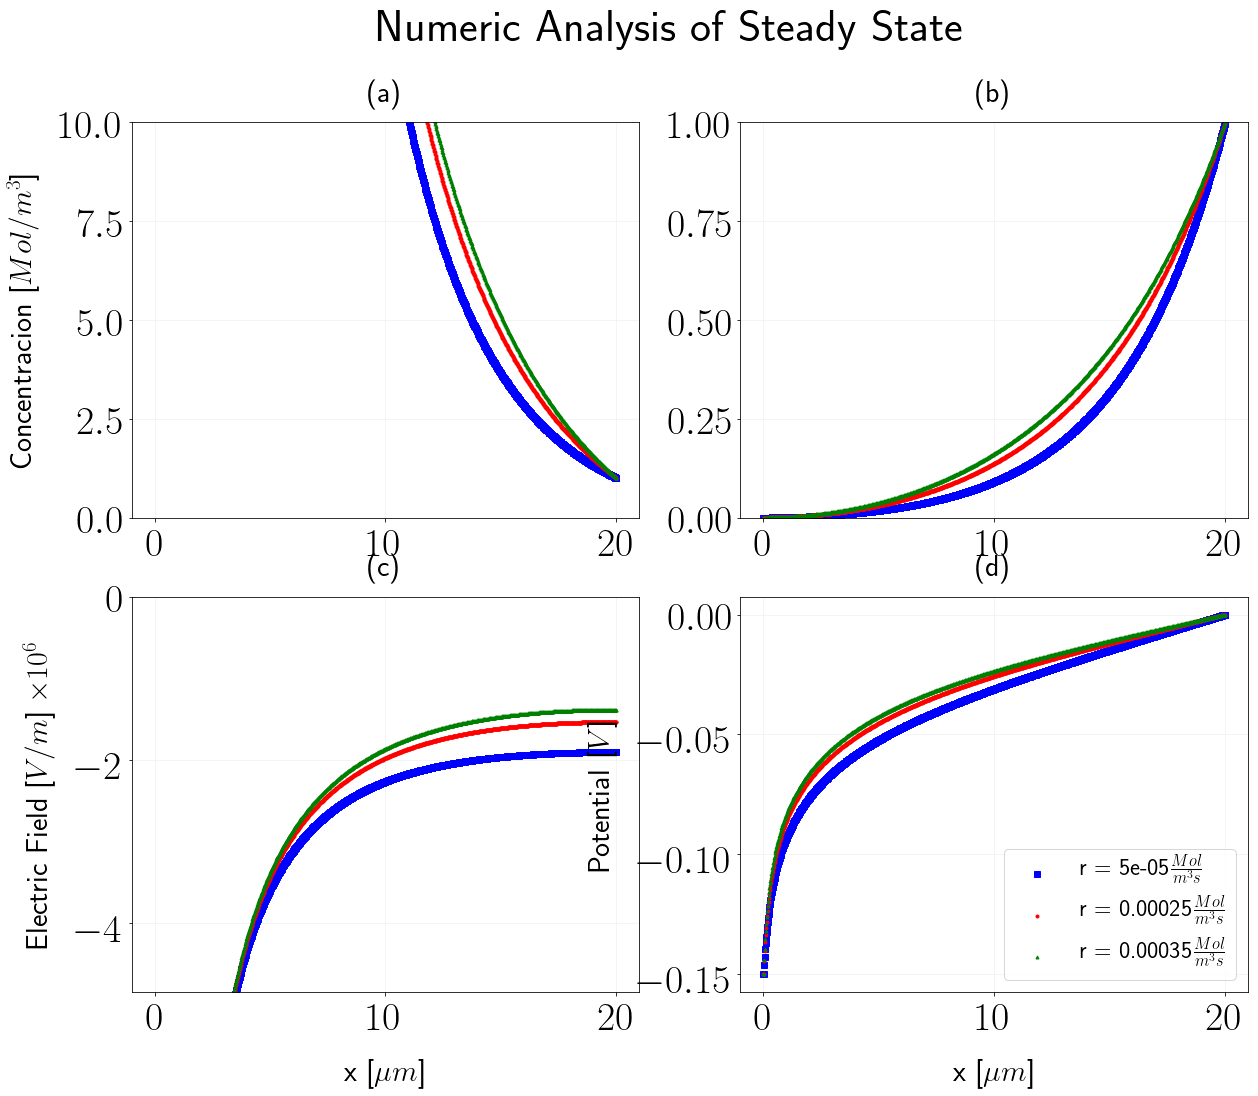

In [60]:

def remove_points(A):
    A = np.delete(A, [1, 2, 3])
    for i in range(0,int(len(A)/4)):
        index = i+4
        A = np.delete(A, [index-2, index-1, index])
    return A



fig, ax = plt.subplots(figsize=(20,16))

plt.suptitle('Numeric Analysis of Steady State', fontsize=fs*1.5)
plt.subplot(2,2,1)
plt.title(r'(a)', fontsize=fs, fontweight='bold')
plt.ylabel(r'Concentracion [$Mol/m^3$]', fontsize=fs)
plt.grid(True, color= '#F2F2F2')
plt.plot((X), 1e3 * Cp_all[0], 'bs', linewidth=mw, label='r = '+str(reactRate[0])+r'$\frac{Mol}{m^3s}$')
plt.plot((X), 1e3 * (Cp_all[1]), 'ro', markersize=mw, label='r = '+str(reactRate[1])+r'$\frac{Mol}{m^3s}$')
plt.plot((X), 1e3 * (Cp_all[2]), 'g^', markersize=mw, label='r = '+str(reactRate[2])+r'$\frac{Mol}{m^3s}$')
plt.ylim(0,10)
#plt.legend(prop={'size': 12})

plt.subplot(2,2,2)
plt.title('(b)', fontsize=fs, fontweight='bold')
plt.grid(True, color= '#F2F2F2')
plt.plot((X), 1e3 * (Cm_all[0]), 'bs', linewidth=mw, label='r = '+str(reactRate[0])+r'$\frac{Mol}{m^3s}$')
plt.plot((X), 1e3 * (Cm_all[1]), 'ro', markersize=mw, label='r = '+str(reactRate[1])+r'$\frac{Mol}{m^3s}$')
plt.plot((X), 1e3 * (Cm_all[2]), 'g^', markersize=mw, label='r = '+str(reactRate[2])+r'$\frac{Mol}{m^3s}$')
plt.ylim(0,1)
#plt.legend(prop={'size': 12})

scale_factor = 1e-4
plt.subplot(2,2,3)
plt.title(r'(c)', fontsize=fs, fontweight='bold')
plt.grid(True, color= '#F2F2F2')
plt.xlabel(r'x [$\mu m$]', fontsize=fs)
plt.ylabel(r'Electric Field [$V/m$] $\times 10^6$', fontsize=fs)
plt.plot((X), (E_all[0] * scale_factor), 'bs', linewidth=mw)#, label='r = '+str(reactRate[0])+r'$\frac{Mol}{m^3s}$')
plt.plot((X), (E_all[1] *  scale_factor), 'ro', markersize=mw)#, label='r = '+str(reactRate[1])+r'$\frac{Mol}{m^3s}$')
plt.plot((X), (E_all[2] * scale_factor), 'g^', markersize=mw)#, markersize=4, label='r = '+str(reactRate[2])+r'$\frac{Mol}{m^3s}$')
plt.ylim(V_0 / (coef * 20 ) * k * scale_factor,0)
#plt.legend(prop={'size': 12})

plt.subplot(2,2,4)
plt.title(r'(d)', fontsize=fs, fontweight='bold')
plt.grid(True, color= '#F2F2F2')
plt.xlabel(r'x [$\mu m$]', fontsize=fs)
plt.ylabel(r'Potential [$V$]', fontsize=fs)
plt.plot((X), (Psi_all[0]), 'bs', linewidth=mw, label='r = '+str(reactRate[0])+r'$\frac{Mol}{m^3s}$')
plt.plot((X), (Psi_all[1]), 'ro', markersize=mw, label='r = '+str(reactRate[1])+r'$\frac{Mol}{m^3s}$')
plt.plot((X), (Psi_all[2]), 'g^', markersize=mw, label='r = '+str(reactRate[2])+r'$\frac{Mol}{m^3s}$')
plt.legend(prop={'size': 24})

plt.savefig('../../../img/results-numeric.eps', format='eps', dpi=1000, fontsize=fs, fontweight='bold')

plt.show()

